In [1]:
from keras.datasets import fashion_mnist

(x_train, y_train),(x_test,y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
import matplotlib.pyplot as plt

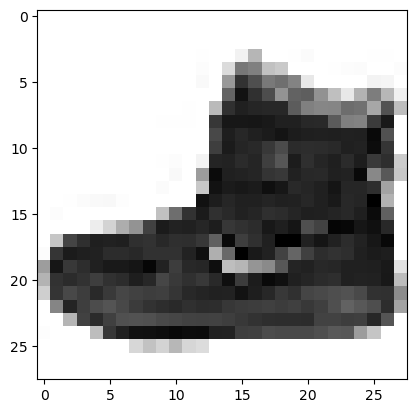

In [4]:
plt.imshow(x_train[0],cmap='gray_r')

In [5]:
x_train.max()

255

In [6]:
x_train = x_train / 255

In [7]:
x_test = x_test / 255

In [10]:
x_train = x_train.reshape(60000,28,28,1)

In [11]:
x_test = x_test.reshape(10000,28,28,1)

In [12]:
from keras.utils import to_categorical

In [14]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [16]:
y_cat_train = to_categorical(y_train)

In [17]:
y_cat_test = to_categorical(y_test)

In [18]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [26]:
model = Sequential()

model.add(Conv2D(32,(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               589952    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
________________________________________________

In [28]:
model.fit(x_train,y_cat_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4034 - accuracy: 0.8577
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2804 - accuracy: 0.9005
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2427 - accuracy: 0.9125
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2179 - accuracy: 0.9213
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2003 - accuracy: 0.9279
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1860 - accuracy: 0.9343
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1737 - accuracy: 0.9378
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1651 - accuracy: 0.9418
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1551 - accuracy: 0.9453
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.147

In [29]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 0s 903us/step - loss: 0.3351 - accuracy: 0.9070


[0.33510613441467285, 0.9070000052452087]

In [30]:
model.metrics_names

['loss', 'accuracy']

In [35]:
from sklearn.metrics import classification_report
import numpy as np

In [36]:
predictions = model.predict(x_test)

313/313 [==============================] - 0s 740us/step


In [37]:
predictions = np.argmax(predictions, axis=1)

In [38]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1000
           1       0.98      0.98      0.98      1000
           2       0.88      0.85      0.86      1000
           3       0.86      0.96      0.90      1000
           4       0.90      0.80      0.85      1000
           5       0.99      0.95      0.97      1000
           6       0.73      0.77      0.75      1000
           7       0.93      0.98      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

